In [89]:
import pandas as pd
import numpy as np

In [95]:
df = pd.read_csv("preprocessed_df.csv", encoding = "ISO-8859-1")
df.head()

,article,summary,topic
0,"['musician', 'tackle', 'u', 'red', 'tape', 'mu...","['nigel', 'mccune', 'musician', 'union', 'said...",NaN
1,"['u2s', 'desire', 'number', 'one', 'u2', 'thre...","['still', 'want', 'morethey', 'want', 'biggest...",entertainment
2,"['rocker', 'doherty', 'onstage', 'fight', 'roc...","['babyshambles', 'formed', 'acrimonious', 'dep...",NaN
3,"['snicket', 'top', 'u', 'box', 'office', 'char...","['series', 'unfortunate', 'event', 'also', 'st...",NaN
4,"['ocean', 'twelve', 'raid', 'box', 'office', '...","['ocean', 'twelve', 'crime', 'caper', 'sequel'...",entertainment


In [99]:
# get the number of NaN values in the topic column
num_nan = df['topic'].isna().sum()

# calculate the percentage of NaN values
percentage_nan = (num_nan / len(df)) * 100
print(f"percentage_nan = {percentage_nan:.2f}%")

percentage_nan = 76.49%


In [97]:
print(df["topic"].value_counts())

business         125
sport            121
politics          96
tech              91
entertainment     90
Name: topic, dtype: int64


In [13]:
# REMOVE PUNCTUATION
import string

# TOKENIZATION
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize

# REMOVE STOP WORDS
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# LEMMATIZATION
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

df["article"] = df["article"].astype(str)

def preprocess(text):
    text = str(text) #ensure that it's str like
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    tokenized_text = word_tokenize(punctuationfree)
    no_stop_words = [w for w in tokenized_text if not w in stop_words]
    lemmatized_text = [WordNetLemmatizer().lemmatize(w) for w in no_stop_words]

    return lemmatized_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leolamoureux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leolamoureux/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [100]:
# DATAFRAME LABELISATION WITH KMEANS
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# remove rows with missing topic
df = df[df['topic'].notna()]

# vectorize the articles
vectorizer = TfidfVectorizer()
articles_vectors = vectorizer.fit_transform(df['article'])

# perform k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(articles_vectors)

# find the most common topic for each cluster
cluster_topics = []
for i in range(5):
    topics = df[kmeans.labels_ == i]['topic']
    most_common_topic = Counter(topics).most_common(1)[0][0]
    cluster_topics.append(most_common_topic)

# label the missing topics with the label of the cluster
df['cluster_label'] = kmeans.predict(articles_vectors)
df['cluster_topic'] = df['cluster_label'].apply(lambda x: cluster_topics[x])
df.loc[df['topic'].isna(), 'topic'] = df['cluster_topic']

# save the updated dataframe
df.to_csv("articles_updated.csv", index=False)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [103]:
df.head()

,article,summary,topic,cluster_label,cluster_topic
1,"['u2s', 'desire', 'number', 'one', 'u2', 'thre...","['still', 'want', 'morethey', 'want', 'biggest...",entertainment,4,entertainment
4,"['ocean', 'twelve', 'raid', 'box', 'office', '...","['ocean', 'twelve', 'crime', 'caper', 'sequel'...",entertainment,4,entertainment
7,"['fockers', 'retain', 'film', 'chart', 'crown'...","['meet', 'fockers', 'also', 'broke', 'box', 'o...",entertainment,4,entertainment
8,"['top', 'gig', 'award', 'scissor', 'sister', '...","['new', 'york', 'band', 'scissor', 'sister', '...",entertainment,4,entertainment
14,"['sundance', 'honour', 'foreign', 'film', 'int...","['independent', 'film', 'festival', 'feature',...",entertainment,4,entertainment


In [104]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# load the training and test data into dataframes
# extract the feature and target columns

X = df["article"]
y = df["topic"]

# split the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer

# convert the "article" column into a bag of words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# initialize the classifiers
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# train the classifiers on the training data
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# make predictions on the test data
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# evaluate the classifiers' performance
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
               precision    recall  f1-score   support

     business       0.91      1.00      0.95        21
entertainment       1.00      0.96      0.98        27
     politics       1.00      0.94      0.97        17
        sport       0.95      1.00      0.98        21
         tech       1.00      0.95      0.97        19

     accuracy                           0.97       105
    macro avg       0.97      0.97      0.97       105
 weighted avg       0.97      0.97      0.97       105

Decision Tree:
               precision    recall  f1-score   support

     business       0.67      0.86      0.75        21
entertainment       0.95      0.74      0.83        27
     politics       0.65      0.76      0.70        17
        sport       0.86      0.86      0.86        21
         tech       0.88      0.74      0.80        19

     accuracy                           0.79       105
    macro avg       0.80      0.79      0.79       105
 weighted avg       0.81

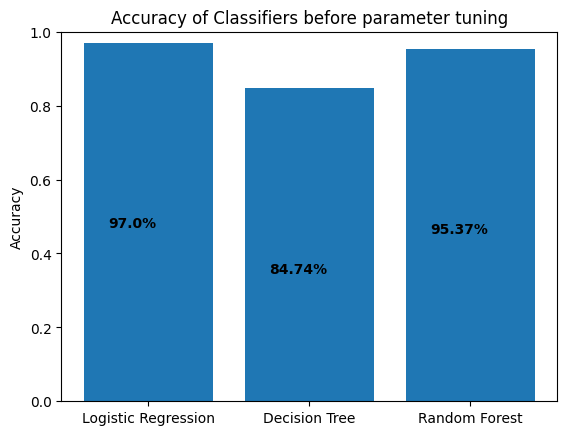

In [75]:
import matplotlib.pyplot as plt

classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
scores = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

plt.bar(classifiers, scores)
plt.ylabel('Accuracy')
plt.title("Accuracy of Classifiers before parameter tuning")
plt.ylim(0,1) # set the y-axis limit to (0,1)

# Add the accuracy percent as text on top of each bar
for i, v in enumerate(scores):
    plt.text(i-.25, v-.5, str(round(v*100,2))+"%", color='black', fontweight='bold')

plt.show()

In [84]:
from sklearn.model_selection import GridSearchCV

# initialize the classifiers
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# define the parameters to tune
param_grid_lr = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
param_grid_dt = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15, 20]}

# tune the parameters with GridSearchCV
grid_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5)
grid_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5)
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)

# train the classifiers on the training data
grid_lr.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

# make predictions on the test data
y_pred_lr = grid_lr.predict(X_test)
y_pred_dt = grid_dt.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

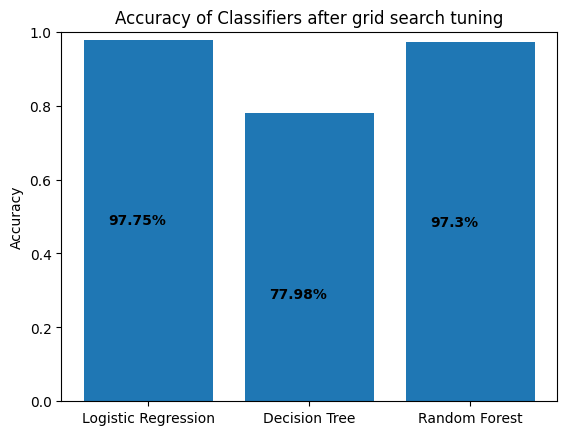

In [ ]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
scores = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

plt.bar(classifiers, scores)
plt.ylabel('Accuracy')
plt.title("Accuracy of Classifiers after grid search tuning")
plt.ylim(0,1) # set the y-axis limit to (0,1)

# Add the accuracy percent as text on top of each bar
for i, v in enumerate(scores):
    plt.text(i-.25, v-.5, str(round(v*100,2))+"%", color='black', fontweight='bold')

plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


# load the training and test data into dataframes
# extract the feature and target columns
X = df["article"]
y = df["topic"]

# split the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer

# convert the "article" column into a bag of words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# initialize the classifiers
naive_bayes = MultinomialNB()
svm = SVC()


# train the classifiers on the training data
naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)


# make predictions on the test data
y_pred_nb = naive_bayes.predict(X_test)
y_pred_svm = svm.predict(X_test)


# evaluate the classifiers' performance
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("SVM:")
print(classification_report(y_test, y_pred_svm))


Naive Bayes:
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       103
entertainment       1.00      0.96      0.98        84
     politics       0.95      0.99      0.97        80
        sport       1.00      0.99      0.99        98
         tech       0.96      1.00      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

SVM:
               precision    recall  f1-score   support

     business       0.95      0.94      0.95       103
entertainment       1.00      0.90      0.95        84
     politics       0.92      0.97      0.95        80
        sport       1.00      0.97      0.98        98
         tech       0.90      0.97      0.93        80

     accuracy                           0.95       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.96      0.95      0.

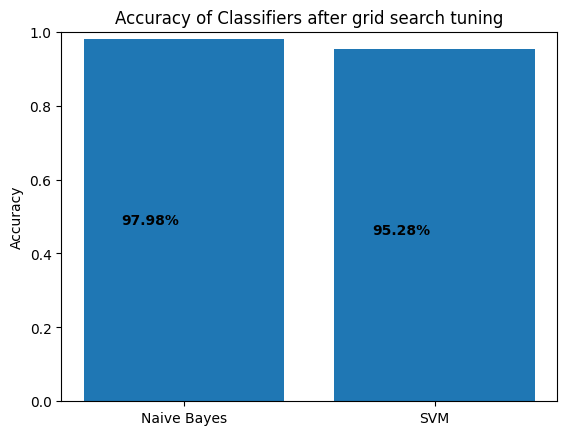

In [ ]:
classifiers = ['Naive Bayes', 'SVM']
scores = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)]

plt.bar(classifiers, scores)
plt.ylabel('Accuracy')
plt.title("Accuracy of Classifiers after grid search tuning")
plt.ylim(0,1) # set the y-axis limit to (0,1)

# Add the accuracy percent as text on top of each bar
for i, v in enumerate(scores):
    plt.text(i-.25, v-.5, str(round(v*100,2))+"%", color='black', fontweight='bold')

plt.show()

### summarization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['summary'], test_size=0.2, random_state=42)

# Vectorize the articles using TF-IDF
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Train a linear SVM model
clf = LinearSVC()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
#print(classification_report(y_test, y_pred))

ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv("preprocessed_df.csv", encoding = "ISO-8859-1")

# Define the feature extraction and model training pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), # Extract features using tf-idf
    ('svd', TruncatedSVD()), # Reduce dimensionality of features
    ('lr', LogisticRegression()) # Train the model using Logistic Regression
])

# Fit the pipeline to the data
pipeline.fit(data['article'], data['summary'])

# Test the model
with open('401.txt', 'rb') as f:
    test_article = f.read()
    #test_article = str(test_article)
    #test_article = preprocess(test_article)
    #test_article = ' '.join(test_article)
    
predicted_summary = pipeline.predict([test_article])
print(predicted_summary)

["['apple', 'said', 'new', 'itunes', 'music', 'player', 'would', 'become', 'motorolas', 'standard', 'music', 'application', 'music', 'phonesthird', 'generation', 'mobile', '3g', 'ability', 'handle', 'large', 'amount', 'data', 'transfer', 'like', 'video', 'could', 'drive', 'people', 'upgrading', 'phone', 'm', 'milanesi', 'said', 'difficult', 'say', 'quickly', 'would', 'happengood', 'design', 'look', 'mobile', 'well', 'new', 'service', 'music', 'downloads', 'could', 'go', 'way', 'pushing', 'sale', '2005', 'said', 'analystsin', 'july', 'last', 'year', 'motorola', 'apple', 'announced', 'version', 'itunes', 'online', 'music', 'downloading', 'service', 'would', 'released', 'would', 'compatible', 'motorola', 'mobile', 'phonesbut', 'challenge', 'balancing', 'storage', 'capacity', 'battery', 'life', 'mobile', 'music', 'hope', 'compete', 'digital', 'music', 'player', 'like', 'ipodsony', 'ericsson', 'released', 'walkman', 'branded', 'mobile', 'phone', 'w800', 'combine', 'digital', 'music', 'playe

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import precision_score, classification_report

df = pd.read_csv("preprocessed_df.csv", encoding = "ISO-8859-1")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['summary'], test_size=0.2, random_state=42)

# Initialize the label encoder
le = LabelEncoder()

# Fit the label encoder on the training labels
le.fit(df['summary'])

# Transform the training and test labels
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Tokenize the articles
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to the same length
max_length = max([len(i) for i in X_train])
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# one hot encoded y_train and y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=len(le.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision*100))
print(classification_report(y_test, y_pred))

Epoch 1/5
56/56 [==============================] - 121s 2s/step - loss: 0.4411 - accuracy: 0.0000e+00
Epoch 2/5
56/56 [==============================] - 117s 2s/step - loss: 0.0932 - accuracy: 5.6180e-04
Epoch 3/5
56/56 [==============================] - 118s 2s/step - loss: 0.0434 - accuracy: 0.0000e+00
Epoch 4/5
56/56 [==============================] - 118s 2s/step - loss: 0.0280 - accuracy: 0.0011
Epoch 5/5
14/14 [==============================] - 6s 414ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets